# Project – Credit Card Fraud Detection

## Problem Statement:
1. A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person’s name on it to charge purchases and services to his linked account. Charges are debited regularly. Nowadays, card data is read by ATMs, swiping machines, store readers, banks and online transactions.
2. Each card has a unique card number which is very important. Its security mainly relies on the physical security of the card and also the privacy of the credit card number. There is a rapid growth in credit card transactions which has led to substantial growth in scam cases.
3. Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. Multiple data mining and statistical techniques are used to catch fraud. Therefore the detection of fraud using efficient and secured methods are very important.

## Tasks To Be Performed:

### 1. Load the dataset using the pandas module.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [196]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


### 2. Perform missing value analysis on the dataset.

In [197]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [198]:
df[df['Amount'].isnull()].T

,11664
Time,19915.000000
V1,1.504229
V2,-0.499337
V3,0.052377
V4,-0.576345
V5,-0.393971
V6,0.015149
V7,-0.718603
V8,-0.125852
V9,1.023281


All null values are in one row. So it's best to just remove that row.

In [199]:
df.dropna(inplace=True)

In [200]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11659,19914,1.348167,-0.531813,0.737667,-0.312410,-1.147767,-0.585711,-0.810412,-0.062116,0.705208,...,-0.120215,-0.076450,0.006995,0.489243,0.448523,-0.309831,-0.021411,-0.003987,5.00,0.0
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0


### 3. From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [201]:
df['Class'].value_counts()

0.0    11615
1.0       49
Name: Class, dtype: int64

In [202]:
genuine_transactions = df['Class'].value_counts()[0]
fraud_transactions = df['Class'].value_counts()[1]
percentage_fraud_transactions = fraud_transactions/(genuine_transactions+fraud_transactions)
print('Genuine Transactions: ', genuine_transactions)
print('Fraud Transactions: ', fraud_transactions)
print('Percentage Fraud Transactions: ', percentage_fraud_transactions*100,'%')

Genuine Transactions:  11615
Fraud Transactions:  49
Percentage Fraud Transactions:  0.4200960219478738 %


### 4. Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.

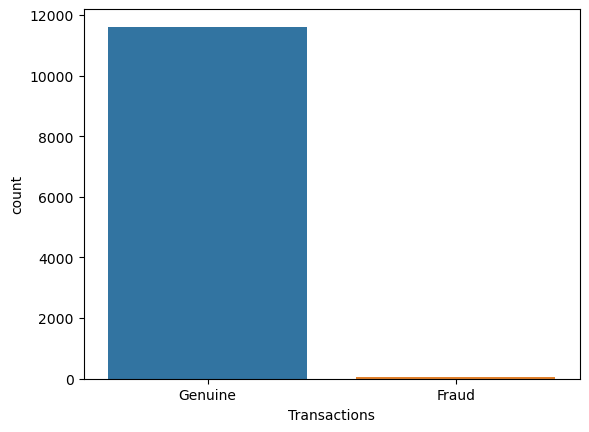

In [203]:
sns.countplot(data=df, x='Class', hue_order=['A', 'B'])
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fraud'])
plt.xlabel('Transactions')
plt.show()

### 5. Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.

In [204]:
sc = StandardScaler()
df['NormalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1, 1))

In [205]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.482873
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.334272
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.756668
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.337607
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.040014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11659,19914,1.348167,-0.531813,0.737667,-0.312410,-1.147767,-0.585711,-0.810412,-0.062116,0.705208,...,-0.076450,0.006995,0.489243,0.448523,-0.309831,-0.021411,-0.003987,5.00,0.0,-0.321425
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0,-0.293618
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0,-0.321425
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0,-0.293618


### 6. Split the dataset in train and test set and have a 70:30 split ratio for the model.


In [206]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

### 7. Now use a decision tree and random forest model for training on top of the train set.

#### Decision Tree

In [207]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [208]:
dt_y_pred = dt.predict(X_test)

In [209]:
dt_cf = confusion_matrix(y_test,dt_y_pred)
dt_cf

array([[3482,    2],
       [   2,   14]], dtype=int64)

In [210]:
dt_score = dt.score(X_test,y_test)
dt_score

0.9988571428571429

#### Random Forest

In [211]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [212]:
rf_y_pred = rf.predict(X_test)

In [213]:
rf_cf = confusion_matrix(y_test,rf_y_pred)
rf_cf

array([[3483,    1],
       [   2,   14]], dtype=int64)

In [214]:
rf_score = rf.score(X_test,y_test)
rf_score

0.9991428571428571

In [215]:
print('Decision Tree score: ', dt_score)
print ('Random Forest score: ', rf_score)

Decision Tree score:  0.9988571428571429
Random Forest score:  0.9991428571428571


`Observation: Random Forest model is slightly better`

### 10. Check the performance matrix of both models and compare which model is having the highest performance.

#### Decision Tree

In [216]:
dt_cf

array([[3482,    2],
       [   2,   14]], dtype=int64)

In [217]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.88      0.88      0.88        16

    accuracy                           1.00      3500
   macro avg       0.94      0.94      0.94      3500
weighted avg       1.00      1.00      1.00      3500



In [218]:
print('Accuracy: ', accuracy_score(y_test, dt_y_pred))
print('Precision: ', precision_score(y_test, dt_y_pred))
print('Recall: ', recall_score(y_test, dt_y_pred))
print('F1 score: ', f1_score(y_test, dt_y_pred))

Accuracy:  0.9988571428571429
Precision:  0.875
Recall:  0.875
F1 score:  0.875


#### Random Forest

In [219]:
rf_cf

array([[3483,    1],
       [   2,   14]], dtype=int64)

In [220]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500



In [221]:
print('Accuracy: ', accuracy_score(y_test, rf_y_pred))
print('Precision: ', precision_score(y_test, rf_y_pred))
print('Recall: ', recall_score(y_test, rf_y_pred))
print('F1 score: ', f1_score(y_test, rf_y_pred))

Accuracy:  0.9991428571428571
Precision:  0.9333333333333333
Recall:  0.875
F1 score:  0.9032258064516129


# It is safe to say, Random Forest model has the highest performance.